
# AUC with 95% CI


# Setup

In [6]:
library(readr)
library(dplyr)
library(ggplot2)

In [7]:
input_dir <- "../8_ROC/AUC_CI_DeLong_summary_merged.txt"              # CHANGE THIS
output_dir <- "../8_ROC"                                              # CHANGE THIS

# Data wrangling

In [8]:
# Input file
df <- readr::read_tsv(input_dir, show_col_types = FALSE)

# Define and filter relationships
rel_order <- c("HS", "GPGC", "UNI", "FC")
df_plot <- df %>%
  filter(source_file %in% rel_order) %>%
  droplevels()

# Standardize panel names (case-insensitive) for consistent axes/legends
panel_formatted_map <- c(
  "23astr"           = "23aSTR",
  "27astr"           = "27aSTR",
  "90iisnp"          = "90iiSNP",
  "94iisnp"          = "94iiSNP",
  "23astr-90iisnp"   = "23aSTR + 90iiSNP",
  "23astr-94iisnp"   = "23aSTR + 94iiSNP",
  "27astr-94iisnp"   = "27aSTR + 94iiSNP"
)

df_plot <- df_plot %>%
  mutate(
    Panel_std = dplyr::case_when(
      tolower(Panel) %in% names(panel_formatted_map) ~ panel_formatted_map[tolower(Panel)],
      TRUE ~ Panel
    )
  )

# Order of marker panels (legend order)
panel_levels <- c(
  "23aSTR",
  "27aSTR",
  "90iiSNP",
  "94iiSNP",
  "23aSTR + 90iiSNP",
  "27aSTR + 94iiSNP",
  "23aSTR + 94iiSNP"
)

# Shared palette so colors match other scripts
panel_palette_base <- setNames(scales::hue_pal()(length(panel_levels)), panel_levels)

# Keep only panels that are present in the data
panel_levels_present  <- panel_levels[panel_levels %in% unique(df_plot$Panel_std)]
panel_palette_present <- panel_palette_base[panel_levels_present]

# Reorders marker panels and relationships for the plot
df_plot <- df_plot %>%
  mutate(
    Panel_std   = factor(Panel_std,   levels = panel_levels_present),
    source_file = factor(source_file, levels = rel_order)
  )

print(table(df_plot$Panel_std, df_plot$source_file))


                  
                   HS GPGC UNI FC
  23aSTR            1    1   1  1
  90iiSNP           1    1   1  1
  94iiSNP           1    1   1  1
  23aSTR + 90iiSNP  1    1   1  1
  23aSTR + 94iiSNP  1    1   1  1


# Creating Plot

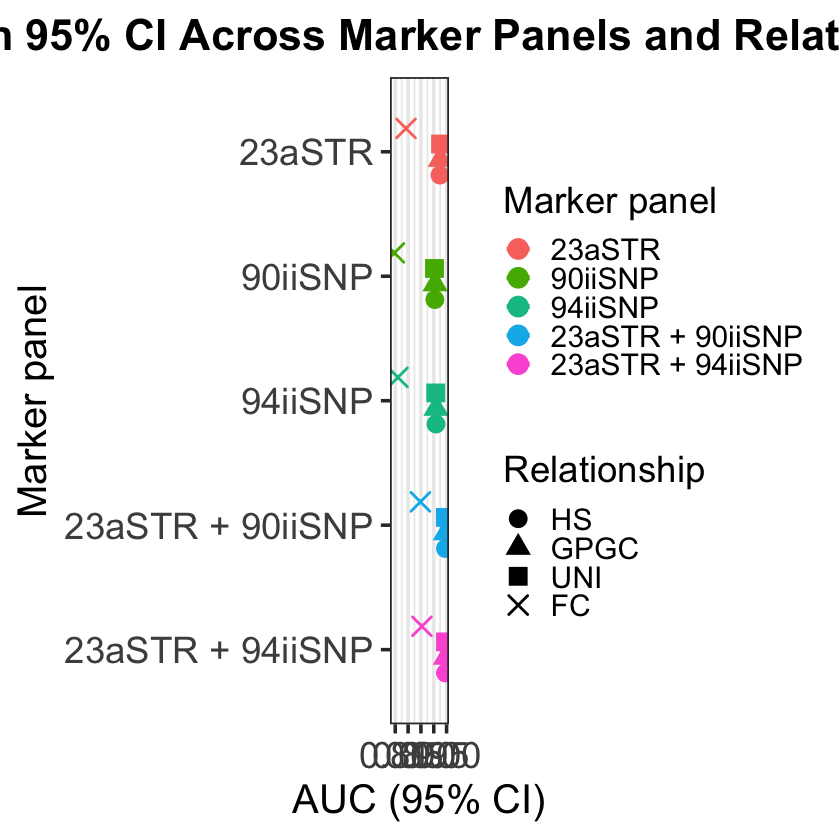

In [9]:
# colour = marker panel
# shape = relationship

dodge <- position_dodge(width = 0.5)

p_all <- ggplot(
  df_plot,
  aes(x = AUC, y = Panel_std, colour = Panel_std, shape = source_file)
) +
  geom_point(size = 4.5, stroke = 1.2, position = dodge) +
  geom_errorbar(
    aes(xmin = AUC_CI_lower, xmax = AUC_CI_upper, group = source_file),
    width = 0,
    linewidth = 1.4,
    position = dodge
  ) +
  scale_x_continuous("AUC (95% CI)", limits = c(0.79, 0.999)) +
  scale_y_discrete("Marker panel", limits = rev(panel_levels_present), labels = rev(panel_levels_present)) +
  scale_colour_manual(
    name   = "Marker panel",
    values = panel_palette_present,
    breaks = panel_levels_present,
    labels = panel_levels_present
  ) +
  scale_shape_manual(
    name   = "Relationship",
    values = c(16, 17, 15, 4) # HS, GPGC, UNI, FC
  ) +
  labs(title = "AUC with 95% CI Across Marker Panels and Relationships") +
  theme_bw(base_size = 22) +
  theme(
    panel.grid.major.y = element_blank(),
    legend.position = "right",
    axis.title = element_text(size = 24),
    axis.text  = element_text(size = 22),
    legend.title = element_text(size = 22),
    legend.text  = element_text(size = 18),
    plot.title   = element_text(size = 26, face = "bold", hjust = 0.5)
  )

p_all


# Saving Plot

In [10]:

output_png <- file.path(output_dir, paste0("AUC_with_95CI_HS GPGC UNI FC.png"))
ggsave(output_png, p_all, width = 25, height = 6, dpi = 300)
output_png

[1] "../8_ROC/AUC_with_95CI_HS GPGC UNI FC.png"